In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001077428"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001077428
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,TEXAS CAPITAL BANCSHARES INC/TX
Ticker,TCBI


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,57.0,2.154649e+01,1.243633e+01,6.65,11.55,16.96,3.142000e+01,4.838000e+01
interest income,60.0,1.122510e+08,7.827210e+07,20970000.00,60759250.00,79815500.00,1.534945e+08,3.255610e+08
net income,60.0,2.481248e+07,2.190879e+07,3332000.00,6629000.00,19178500.00,3.690250e+07,8.555200e+07
net interest income,60.0,9.242797e+07,6.752533e+07,12664000.00,33833000.00,75146000.00,1.420830e+08,2.406730e+08
provision for loan losses,59.0,8.149153e+06,7.846695e+06,0.00,1800000.00,6500000.00,1.300000e+07,3.500000e+07


# Plots

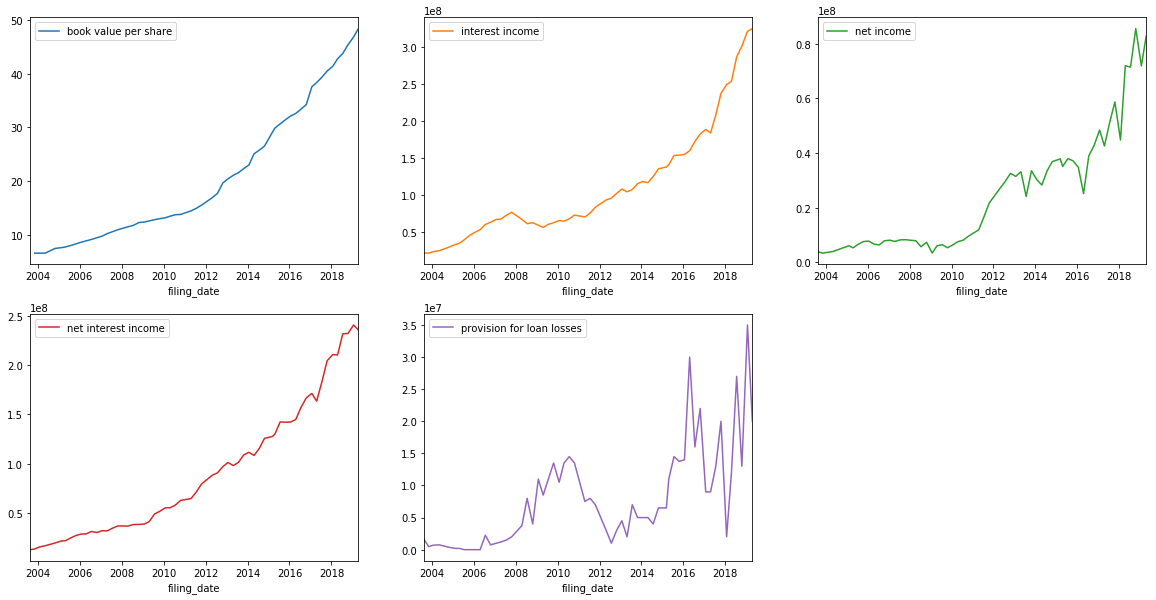

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0001077428 book value per share                            2003Q2  missing   
           book value per share       2003Q4 to 2004Q2: 3 periods  missing   
           book value per share                            2007Q4  missing   
           book value per share                            2010Q4  missing   
           book value per share                            2011Q4  missing   
           interest income                                 2004Q2  missing   
           interest income                                 2007Q4  missing   
           interest income                                 2010Q4  missing   
           interest income                                 2011Q4  missing   
           net income                                      2004Q2  missing   
           net income                                      2007Q4  missing   
           net income                                      2010Q4  missing   
           net income                                      2011Q4  missing   
           net interest income                             2004Q2  missing   
           net interest income                             2007Q4  missing   
           net interest income                             2010Q4  missing   
           net interest income                             2011Q4  missing   
           provision for loan losses                       2004Q2  missing   
           provision for loan losses                       2005Q1  missing   
           provision for loan losses                       2007Q4  missing   
           provision for loan losses                       2010Q4  missing   
           provision for loan losses                       2011Q4  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0001077428 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()